Train points [[1. ]
 [1.5]
 [2. ]
 [3. ]
 [5. ]
 [6. ]
 [7. ]
 [7.5]
 [8. ]
 [8.5]]
Value at Train points [ 0.84147098  1.49624248  1.81859485  0.42336002 -4.79462137 -1.67649299
  4.59890619  7.03499983  7.91486597  6.78714046]
Test points [[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
GPML kernel: 12**2 * RBF(length_scale=2.52)
Log-marginal-likelihood: -9.754
Value at Test points [-0.02636547  1.49680268 -4.79462137  7.0349998  -5.91064622]
Confidenne at Test point predictions  [0.23132706 0.00192007 0.         0.         0.43453599]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


GPML kernel: 3.51**2 * RBF(length_scale=0.666)
Log-marginal-likelihood: -39.640


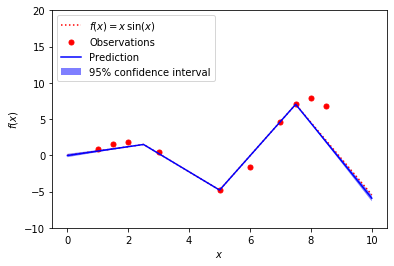

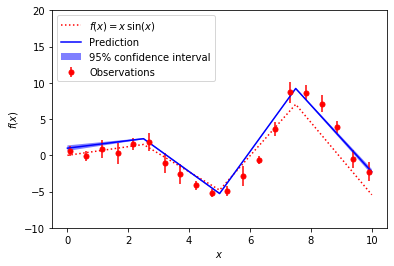

In [70]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression

np.random.seed(1)



def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 1.5, 2., 3., 5., 6., 7., 7.5, 8., 8.5]).T
print("Train points",X)
# Observations
y = f(X).ravel()
print("Value at Train points",y)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 5)).T
print("Test points",x)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
#kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
print(gp)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)
print("Value at Test points",y_pred)
print("Confidenne at Test point predictions ",1.9600 * sigma)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
# alpha=dy ** 2,
gp = GaussianProcessRegressor(kernel=kernel, 
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

slope is: [0.3801158]
intercept is: -1.2598442423700833


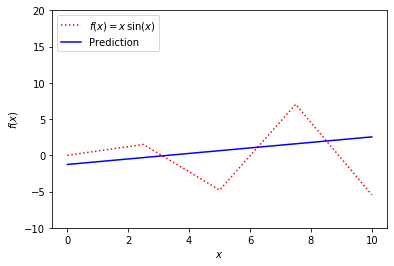

In [60]:
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(x)

print("slope is:", linreg.coef_)
print("intercept is:", linreg.intercept_)

plt.figure()
plt.plot(x, f(x), 'r:', label='$f(x) = x\,\sin(x)$')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

coeff is: [ 0.         -5.75535671  1.40060535 -0.08661438]
intercept is: 4.332311750125266


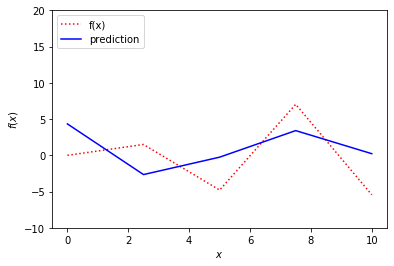

In [69]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
#poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

y_pred = lin2.predict(poly.fit_transform(x))


print("coeff is:", lin2.coef_)
print("intercept is:", lin2.intercept_)


plt.plot(x, f(x), 'r:', label = 'f(x)') 
  
plt.plot(x, y_pred, 'b-', label = 'prediction') 
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

coeff is: [ 0.00000000e+00 -6.12755863e-02  1.31981119e-01  2.35091057e-01
  8.34810337e-02 -1.54924395e-01  4.38613920e-02 -3.85489506e-03
 -1.00330356e-04  3.09394545e-05 -1.18113776e-06]
intercept is: 0.24247218083449196
[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[ 0.        ]
 [ 1.49618036]
 [-4.79462137]
 [ 7.03499983]
 [-5.44021111]]
[ 0.24247218  1.0282803  -5.46798226  8.32087123 -2.22757755]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.96476e-21): result may not be accurate.
  overwrite_a=True).T


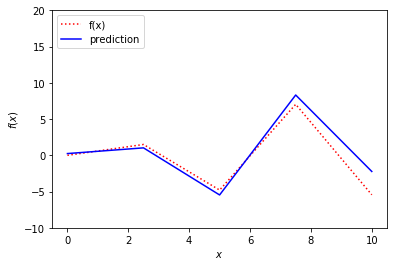

In [71]:
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(X) 


ridgereg = Ridge(alpha=1.0)
ridgereg.fit(X_poly,y)

y_pred = ridgereg.predict(poly.fit_transform(x))

print("coeff is:", ridgereg.coef_)
print("intercept is:", ridgereg.intercept_)


plt.plot(x, f(x),'r:', label = 'f(x)') 
print(x)
print(f(x))
print(y_pred)  
plt.plot(x, y_pred,'b-', label = 'prediction') 
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

coeff is: [ 0.00000000e+00 -0.00000000e+00 -6.30490295e-01  6.70808572e-02
  7.78459774e-03 -3.16646519e-05 -3.41089222e-05 -3.63322122e-06
 -2.39503443e-07 -5.54186073e-09  1.39631817e-09]
intercept is: 1.2997947067225177
[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[ 0.        ]
 [ 1.49618036]
 [-4.79462137]
 [ 7.03499983]
 [-5.44021111]]
[ 1.29979471 -1.30255584 -2.21847535  5.06603692 -5.95902319]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.333235847674814, tolerance: 0.03183271465040071
  positive)


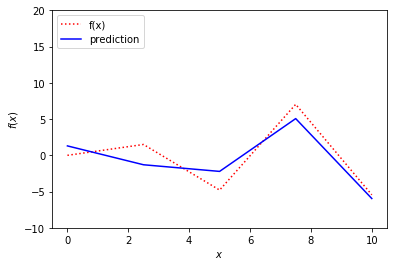

In [66]:
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(X) 


lassoreg = Lasso(alpha=1.0)
lassoreg.fit(X_poly,y)

y_pred = lassoreg.predict(poly.fit_transform(x))

print("coeff is:", lassoreg.coef_)
print("intercept is:", lassoreg.intercept_)


plt.plot(x, f(x),'r:', label = 'f(x)') 
print(x)
print(f(x))
print(y_pred)  
plt.plot(x, y_pred,'b-', label = 'prediction') 
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()